#Import libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as ss
import math
import seaborn as sns
import sklearn as sk

#Loading the CSV file
From github

In [ ]:
file = "https://raw.githubusercontent.com/cararm4073/finalProyects1/refs/heads/main/MA1042/FPdata.csv"

In [ ]:
df = pd.read_csv(file, index_col=0)

#I	Supervised Learning

##Deleting empty and duplicate rows

###Before

In [ ]:
df.head()

,BMI,AGE,FP
0,45.618013,26.540101,57.981574
1,27.902095,45.178652,36.418067
2,27.409945,35.530679,23.001760
3,36.895721,41.279031,49.629954
4,36.854561,21.055048,38.093172


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     1206 non-null   float64
 1   AGE     1206 non-null   float64
 2   FP      1206 non-null   float64
dtypes: float64(3)
memory usage: 37.7 KB


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

###After

In [ ]:
df.head()

,BMI,AGE,FP
0,45.618013,26.540101,57.981574
1,27.902095,45.178652,36.418067
2,27.409945,35.530679,23.001760
3,36.895721,41.279031,49.629954
4,36.854561,21.055048,38.093172


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     1206 non-null   float64
 1   AGE     1206 non-null   float64
 2   FP      1206 non-null   float64
dtypes: float64(3)
memory usage: 37.7 KB


---
##**Outliers and boxplots**

###Before taking the outliers

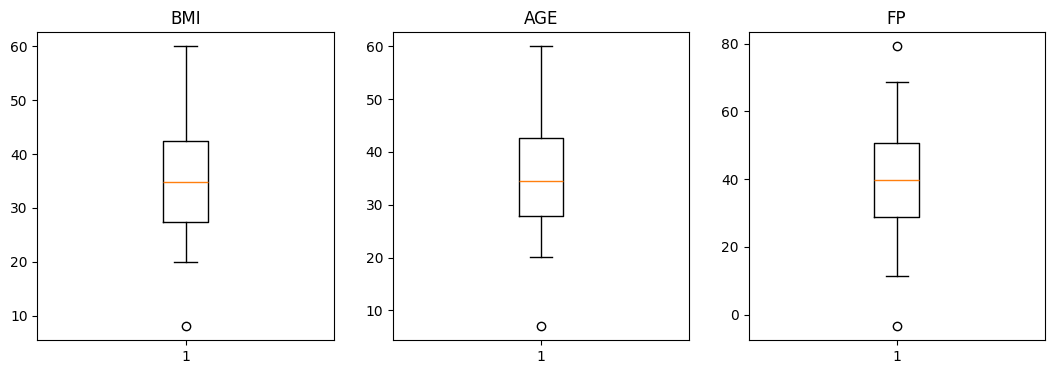

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(13,4))
for i_n,i_v in enumerate(df.columns):
  ax[i_n].boxplot(df[i_v],whis=1.2)
  ax[i_n].set_title(i_v)

###Taking the outliers out

In [ ]:
def my_outliers1(df, column, k=1.2):
  """
  Given a dataframe df and a string find the indeces for which we have an outlier in a boxplot with whishers of size 1.2*IQR
  """
  Q1 = np.quantile(df[column], 0.25)
  Q3 = np.quantile(df[column], 0.75)
  IQR = Q3 - Q1

  top = Q3 + k * IQR
  bottom = Q1 - k * IQR

  outliers = []

  for i in df.index:
    if df[column][i] < bottom or df[column][i] > top:
      outliers.append(i)
  return outliers

Detect and delete outliers

In [ ]:
def my_outliers2(df, columns):
  """
  Given a dataframe df and a list of string columns, find the indeces for which we have outliers in either of the columns using 1.2*IQR for the outliers.
  """
  outliers = []
  for column in columns:
    outliers = outliers + my_outliers1(df, column)
  return outliers

Outliers indexes

In [ ]:
outliers = my_outliers2(df, columns = list(df.columns))
outliers

[554, 207, 554, 677]

In [ ]:
df.drop(outliers, inplace = True)
df.shape

(1203, 3)

Boxplots without outliers

In [ ]:
df.head()

,BMI,AGE,FP
0,45.618013,26.540101,57.981574
1,27.902095,45.178652,36.418067
2,27.409945,35.530679,23.001760
3,36.895721,41.279031,49.629954
4,36.854561,21.055048,38.093172


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 0 to 1205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMI     1203 non-null   float64
 1   AGE     1203 non-null   float64
 2   FP      1203 non-null   float64
dtypes: float64(3)
memory usage: 37.6 KB


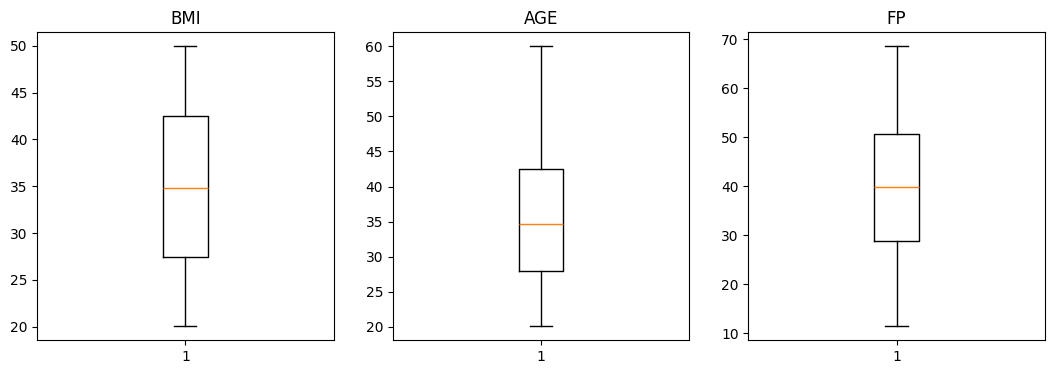

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(13, 4))
for i_n,i_v in enumerate(df.columns):
  ax[i_n].boxplot(df[i_v],whis=1.2)
  ax[i_n].set_title(i_v)

##Linear regression

In [ ]:
df.columns

Index(['BMI', 'AGE', 'FP'], dtype='object')

In [ ]:
model = smf.ols("FP ~ BMI + AGE", data = df)
results= model.fit()

In [ ]:
residuals = results.resid
fittedvalues = results.fittedvalues
order = list(range(len(residuals)))

In [ ]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.846    
Dependent Variable: FP               AIC:                7429.5838
Date:               2025-12-06 13:46 BIC:                7444.8615
No. Observations:   1203             Log-Likelihood:     -3711.8  
Df Model:           2                F-statistic:        3307.    
Df Residuals:       1200             Prob (F-statistic): 0.00     
R-squared:          0.846            Scale:              28.093   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -13.2489    0.8793  -15.0677  0.0000  -14.9740  -11.5237
BMI          1.4409    0.0178   81.0394  0.0000    1.4060    1.4758
AGE          0.0834    0.0178    4.6967  0.0000    0.0486    0.1183
------------------------------------------------------------------
Omnibus

##Significant variables

According to the p-values ​​obtained in the linear regression, both BMI and AGE variables are significant variables for predicting FP, since both have p-values ​​of 0.

##4-in-1 Graph
Data from linear regression

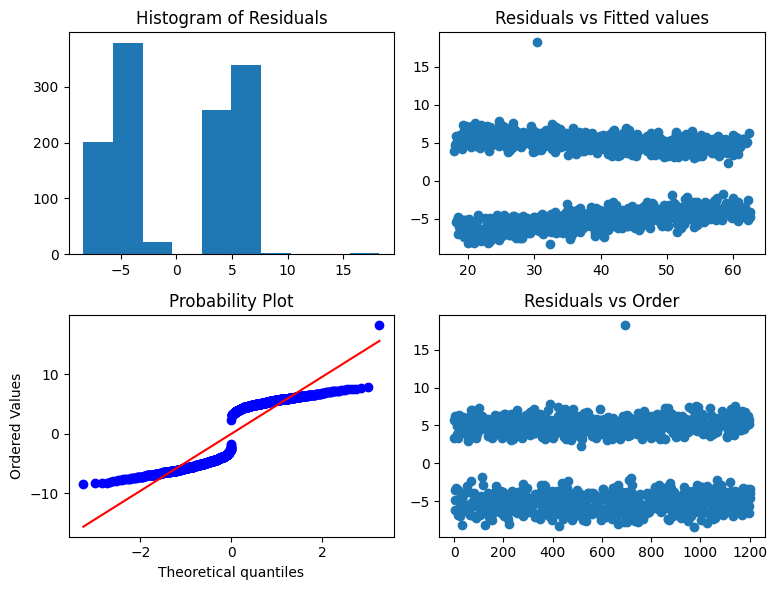

In [ ]:
fig, ax = plt.subplots(2,2, figsize= (8,6))
ax[0,0].hist(residuals)
ax[0,0].set_title('Histogram of Residuals')
ax[0,1].scatter(fittedvalues, residuals)
ax[0,1].set_title('Residuals vs Fitted values')
ax[1,1].scatter(order, residuals)
ax[1,1].set_title('Residuals vs Order')
ss.probplot(residuals, plot = ax[1,0])
fig.tight_layout()
fig.show()

#II	Unsupervised Learning

##Clustering Algorithm DBSCAN

In [ ]:
model_db = sk.cluster.DBSCAN(eps= 2.5, min_samples=5)
results_db = model_db.fit_predict(df)
results_db
colors_db = ['blue' if i==0 else
        'red' if i==1 else
        'black'
        for i in results_db]
df['cluster'] = results_db

##Making 2 groups from the cluster

In [ ]:
df.head(3)

,BMI,AGE,FP,cluster
0,45.618013,26.540101,57.981574,0
1,27.902095,45.178652,36.418067,0
2,27.409945,35.530679,23.001760,1


In [ ]:
group1 = df[df['cluster']==0]
group2 = df[df['cluster']==1]

##General graph of clusters, after DBSCAN

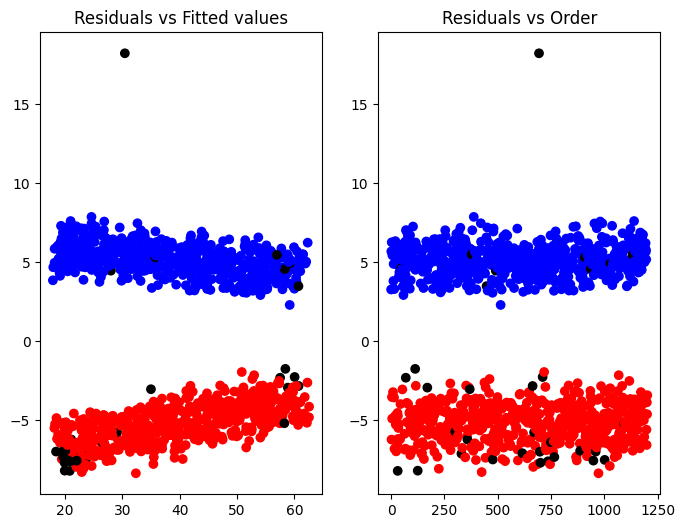

In [ ]:
fig, ax = plt.subplots(1,2, figsize= (8,6))
ax[0].scatter(fittedvalues, residuals, color = colors_db)
ax[0].set_title('Residuals vs Fitted values')
ax[1].scatter(order, residuals, color = colors_db)
ax[1].set_title('Residuals vs Order')
fig.show()


##Linear regression 1 after DBSCAN

In [ ]:
group1.head(3)

,BMI,AGE,FP,cluster
0,45.618013,26.540101,57.981574,0
1,27.902095,45.178652,36.418067,0
3,36.895721,41.279031,49.629954,0


In [ ]:
model1 = smf.ols('FP ~ BMI + AGE', data = group1)
results1 = model1.fit()
residuals1 = results1.resid
fittedvalues1 = results1.fittedvalues
order1 = list(range(len(residuals1)))

In [ ]:
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: FP               AIC:                871.4600 
Date:               2025-12-06 13:46 BIC:                884.6105 
No. Observations:   592              Log-Likelihood:     -432.73  
Df Model:           2                F-statistic:        1.686e+05
Df Residuals:       589              Prob (F-statistic): 0.00     
R-squared:          0.998            Scale:              0.25389  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -8.9932    0.1229  -73.1764  0.0000  -9.2346  -8.7518
BMI            1.3881    0.0024  579.3035  0.0000   1.3834   1.3928
AGE            0.1609    0.0024   66.3129  0.0000   0.1561   0.1657
------------------------------------------------------------------
Omnibus

###Graphs of the new linear regression

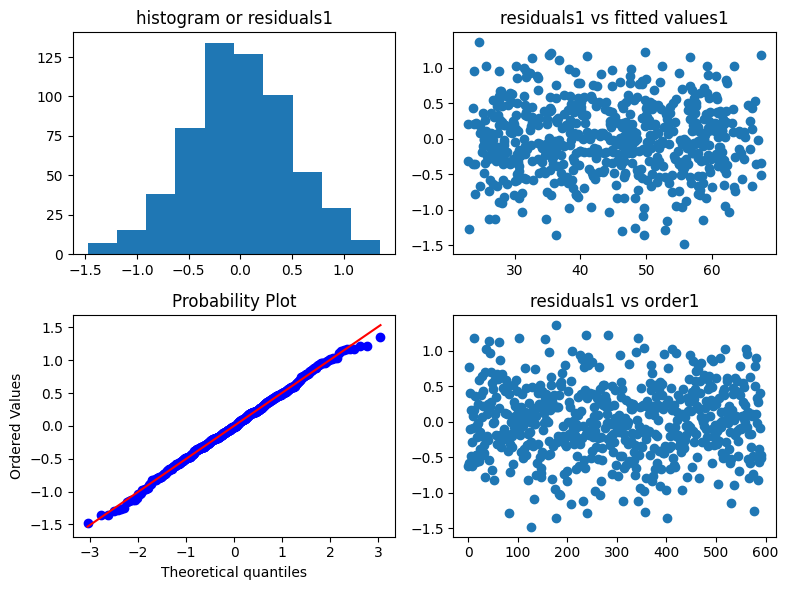

In [ ]:
fig, ax = plt.subplots(2,2, figsize= (8,6))
ax[0,0].hist(residuals1)
ax[0,0].set_title('histogram or residuals1')
ax[0,1].scatter(fittedvalues1, residuals1)
ax[0,1].set_title('residuals1 vs fitted values1')
ax[1,1].scatter(order1, residuals1)
ax[1,1].set_title('residuals1 vs order1')
ss.probplot(residuals1, plot = ax[1,0])
fig.tight_layout()
fig.show()

##Linear regression 2 after DBSCAN

In [ ]:
group2.head(3)

,BMI,AGE,FP,cluster
2,27.409945,35.530679,23.001760,1
4,36.854561,21.055048,38.093172,1
5,29.410375,20.240100,25.934315,1


In [ ]:
model2 = smf.ols('FP ~ BMI + AGE', data = group2)
results2 = model2.fit()
residuals2 = results2.resid
fittedvalues2 = results2.fittedvalues
order2 = list(range(len(residuals2)))

In [ ]:
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.998    
Dependent Variable: FP               AIC:                837.7812 
Date:               2025-12-06 13:46 BIC:                850.8599 
No. Observations:   578              Log-Likelihood:     -415.89  
Df Model:           2                F-statistic:        1.901e+05
Df Residuals:       575              Prob (F-statistic): 0.00     
R-squared:          0.998            Scale:              0.24818  
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept     -19.2290   0.1150 -167.1438 0.0000 -19.4550 -19.0030
BMI             1.5476   0.0025  608.0916 0.0000   1.5426   1.5526
AGE            -0.0000   0.0024   -0.0060 0.9952  -0.0048   0.0048
------------------------------------------------------------------
Omnibus:     

###Graphs of linear regression

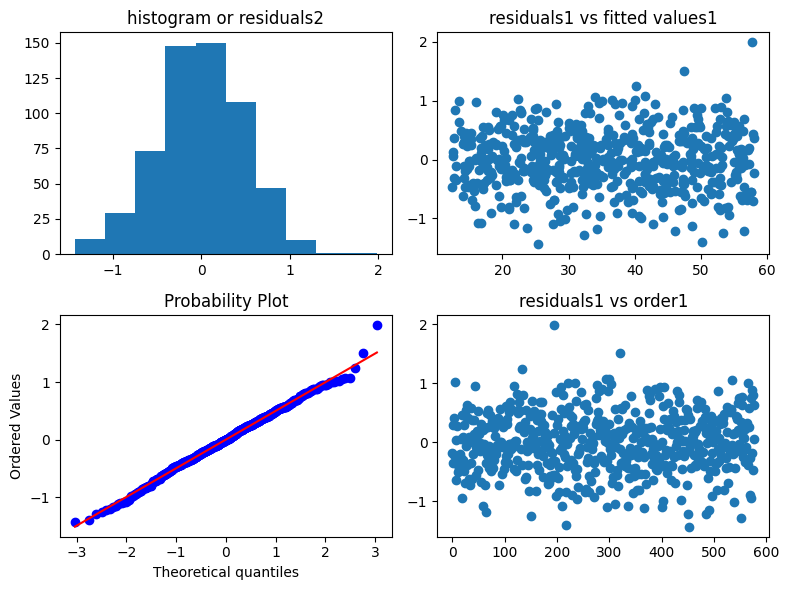

In [ ]:
fig, ax = plt.subplots(2,2, figsize= (8,6))
ax[0,0].hist(residuals2)
ax[0,0].set_title('histogram or residuals2')
ax[0,1].scatter(fittedvalues2, residuals2)
ax[0,1].set_title('residuals1 vs fitted values1')
ax[1,1].scatter(order2, residuals2)
ax[1,1].set_title('residuals1 vs order1')
ss.probplot(residuals2, plot = ax[1,0])
fig.tight_layout()
fig.show()